<a href="https://colab.research.google.com/github/ChaimmyII/BlueDragon/blob/main/DrKasorn_2_ipython_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd



/content


# Jupyter Audio Basics

## Audio Libraries

We will mainly use two libraries for audio acquisition and playback:

### 1. librosa

[`librosa`](https://librosa.github.io/librosa/index.html) is a Python package for music and audio processing by [Brian McFee](https://bmcfee.github.io/). A large portion was ported from [Dan Ellis's Matlab audio processing examples](http://www.ee.columbia.edu/%7Edpwe/resources/matlab/).

### 2. IPython.display.Audio

[`IPython.display.Audio`](http://ipython.org/ipython-doc/stable/api/generated/IPython.display.html#IPython.display.Audio) lets you play audio directly in an IPython notebook.

## Included Audio Data

This GitHub repository includes many short audio excerpts for your convenience.

Here are the files currently in the `audio` directory:

In [ ]:
ls audio

ls: cannot access 'audio': No such file or directory


Visit https://ccrma.stanford.edu/workshops/mir2014/audio/ for more audio files.

## Reading Audio

Use [`librosa.load`](https://librosa.github.io/librosa/generated/librosa.core.load.html#librosa.core.load) to load an audio file into an audio array. Return both the audio array as well as the sample rate:

In [ ]:
import librosa
x, sr = librosa.load('audio/simpleLoop.wav')

If you receive an error with `librosa.load`, you may need to [install ffmpeg](https://librosa.github.io/librosa/install.html#ffmpeg).

Display the length of the audio array and sample rate:

In [ ]:
print(x.shape)
print(sr)

(66150,)
22050


## Visualizing Audio

In order to display plots inside the Jupyter notebook, run the following commands, preferably at the top of your notebook:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

Plot the audio array using [`librosa.display.waveshow`](https://librosa.org/doc/latest/display.html):

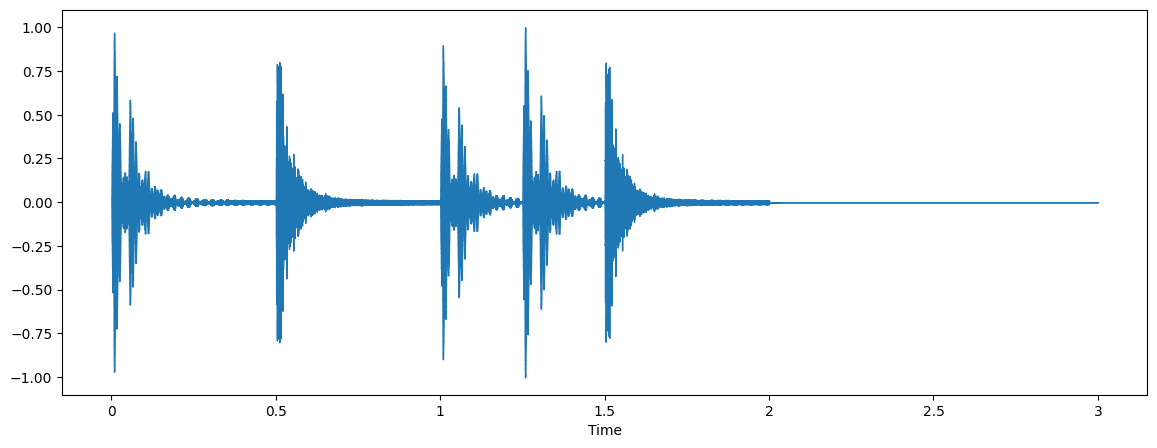

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x)


Display a spectrogram using [`librosa.display.specshow`](https://librosa.github.io/librosa/generated/librosa.display.specshow.html):

In [ ]:
S = librosa.stft(x)
librosa.get_duration(S=S, sr=sr)

2.995374149659864

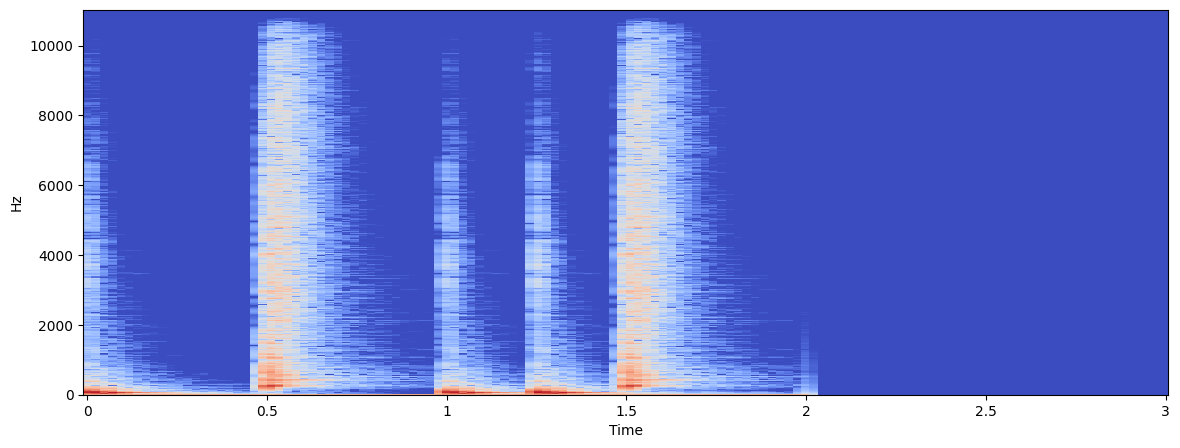

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
import librosa
x, sr = librosa.load('audio/Original_1.wav')

<ipython-input-10-04b1e1470791>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load('audio/Original_1.wav')
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'audio/Original_1.wav'

In [ ]:
print(x.shape)
print(sr)

(178605,)
22050


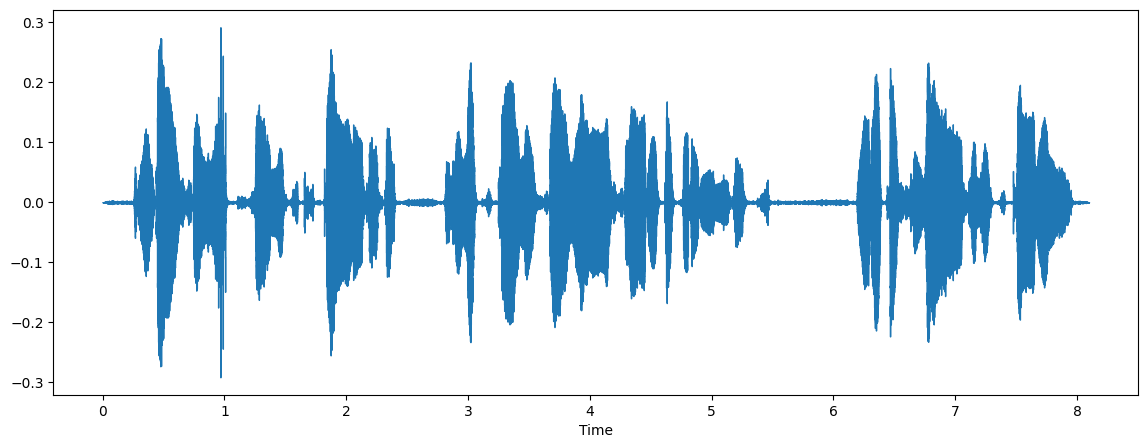

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x)

In [ ]:
import IPython.display as ipd
ipd.Audio('audio/Original_1.wav')

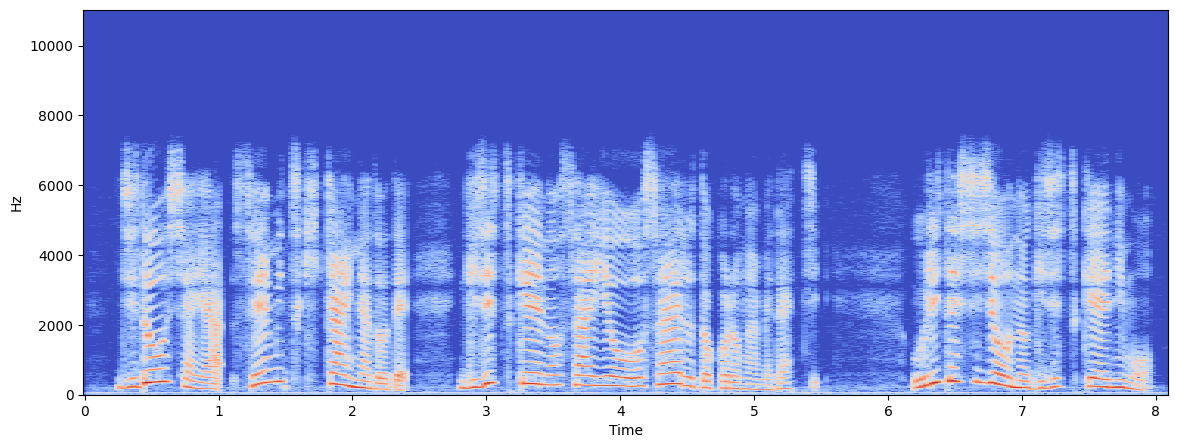

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
librosa.feature.melspectrogram(y=x, sr=sr)

array([[9.71037080e-05, 2.30759522e-03, 5.31159528e-03, ...,
        4.52558836e-03, 2.74943025e-03, 1.21383800e-03],
       [3.43219959e-04, 4.94384952e-03, 1.53289419e-02, ...,
        1.34302592e-02, 8.80878698e-03, 3.62152304e-03],
       [1.06952284e-04, 5.39806497e-04, 1.30878238e-03, ...,
        1.88085402e-03, 7.71645748e-04, 5.44789189e-04],
       ...,
       [3.23485858e-19, 1.71570970e-18, 5.24102050e-18, ...,
        6.16975821e-18, 3.37842813e-18, 1.93592937e-18],
       [1.34486488e-19, 4.51551176e-19, 1.20058194e-18, ...,
        5.86822658e-19, 4.91873439e-19, 4.88850611e-19],
       [1.50676661e-19, 3.48562226e-19, 7.03718168e-19, ...,
        7.61378085e-19, 3.50610144e-19, 4.92663706e-19]], dtype=float32)

In [ ]:
import numpy as np
D = np.abs(librosa.stft(x))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

In [ ]:
S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,
                                    fmax=8000)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

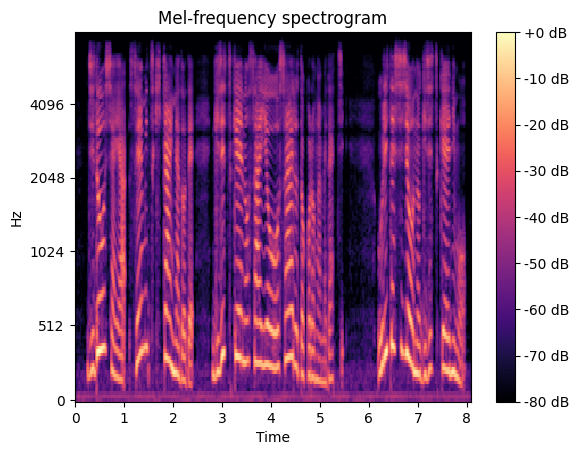

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

## Playing Audio

### `IPython.display.Audio`

Using [`IPython.display.Audio`](http://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html#IPython.lib.display.Audio), you can play an audio file:

In [ ]:
import IPython.display as ipd
ipd.Audio('audio/simpleLoop.wav')

`Audio` can also accept a NumPy array. Let's synthesize a pure tone at 440 Hz:

In [ ]:
import numpy
sr = 22050 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

Listen to the audio array:

In [ ]:
ipd.Audio(x, rate=sr) # load a NumPy array

## Writing Audio

In [ ]:


import numpy as np
import soundfile as sf

rate = 44100
data = np.random.uniform(-1, 1, size=(rate * 10, 2))

# Write out audio as 24bit PCM WAV
sf.write('audio/stereo_file.wav', data, rate, subtype='PCM_24')

In [ ]:
ipd.Audio('audio/stereo_file.wav')

In [ ]:
x, sr = librosa.load('/content/audio/CongaGroove-mono.wav')

In [ ]:
ipd.Audio('/content/audio/CongaGroove-mono.wav')

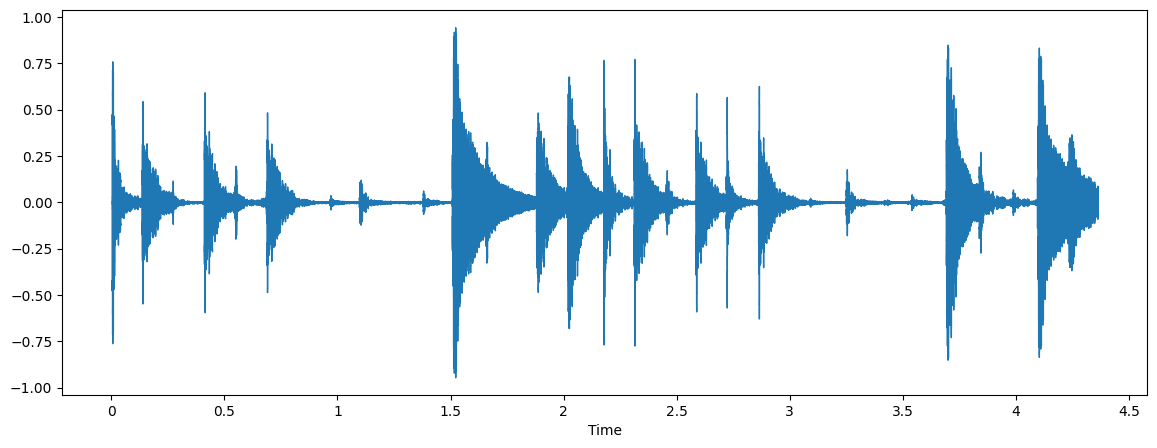

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x)